# Figure 3 - Ye et al. 2023

- Import dependencies and load the data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

sns.set_style("ticks")

In [2]:
def plot_figure3efgh():
    df = pd.read_hdf('../data/Figure3/video_adaptation_scores.h5')

    video_names = ['m3v1mp4',
                   'maushaus_short',
                   'smear_mouse',
                   'golden_mouse'
                   ]

    metrics = ['area_score']
    fig, axs = plt.subplots(4, figsize=(9, 8), dpi=600)
    snap_iters = range(0, 11000, 1000)
    snapshot_list = [1000, 1000, 1000, 10000]
    sizes = [100, 100, 20, 100]
    for i, video_name in enumerate(video_names):
        areas_pre = df.loc[video_name].loc['before_adapt'].loc[metrics[0]].loc['200000']
        areas_post = df.loc[video_name].loc['after_adapt'][metrics[0]].loc[f'{snapshot_list[i]}']

        axs[i].plot(areas_pre, c='dimgray', alpha=.5, label='w/o adaptation')
        axs[i].plot(areas_post, c='lightcoral', label='w/ adaptation')
        size = sizes[i]
        scalebar = AnchoredSizeBar(
           axs[i].transData,
           size=size,
           label=f'{size} frames',
           loc='lower center',
           frameon=False,
           borderpad=-1,
        )

        axs[i].set_xticklabels([])
        axs[i].xaxis.set_tick_params(length=0)
        axs[i].set_yticklabels([])
        axs[i].yaxis.set_tick_params(length=0)
        axs[i].add_artist(scalebar)
        sns.despine(ax=axs[i], top=True, right=True, left=True, bottom=True)
        axs[0].legend(frameon=False, loc='lower right')
    fig.savefig('Figure3efgh.png', dpi=600, bbox_inches='tight', pad_inches=0.05, transparent=True)

Changes in animal body area as a function of time

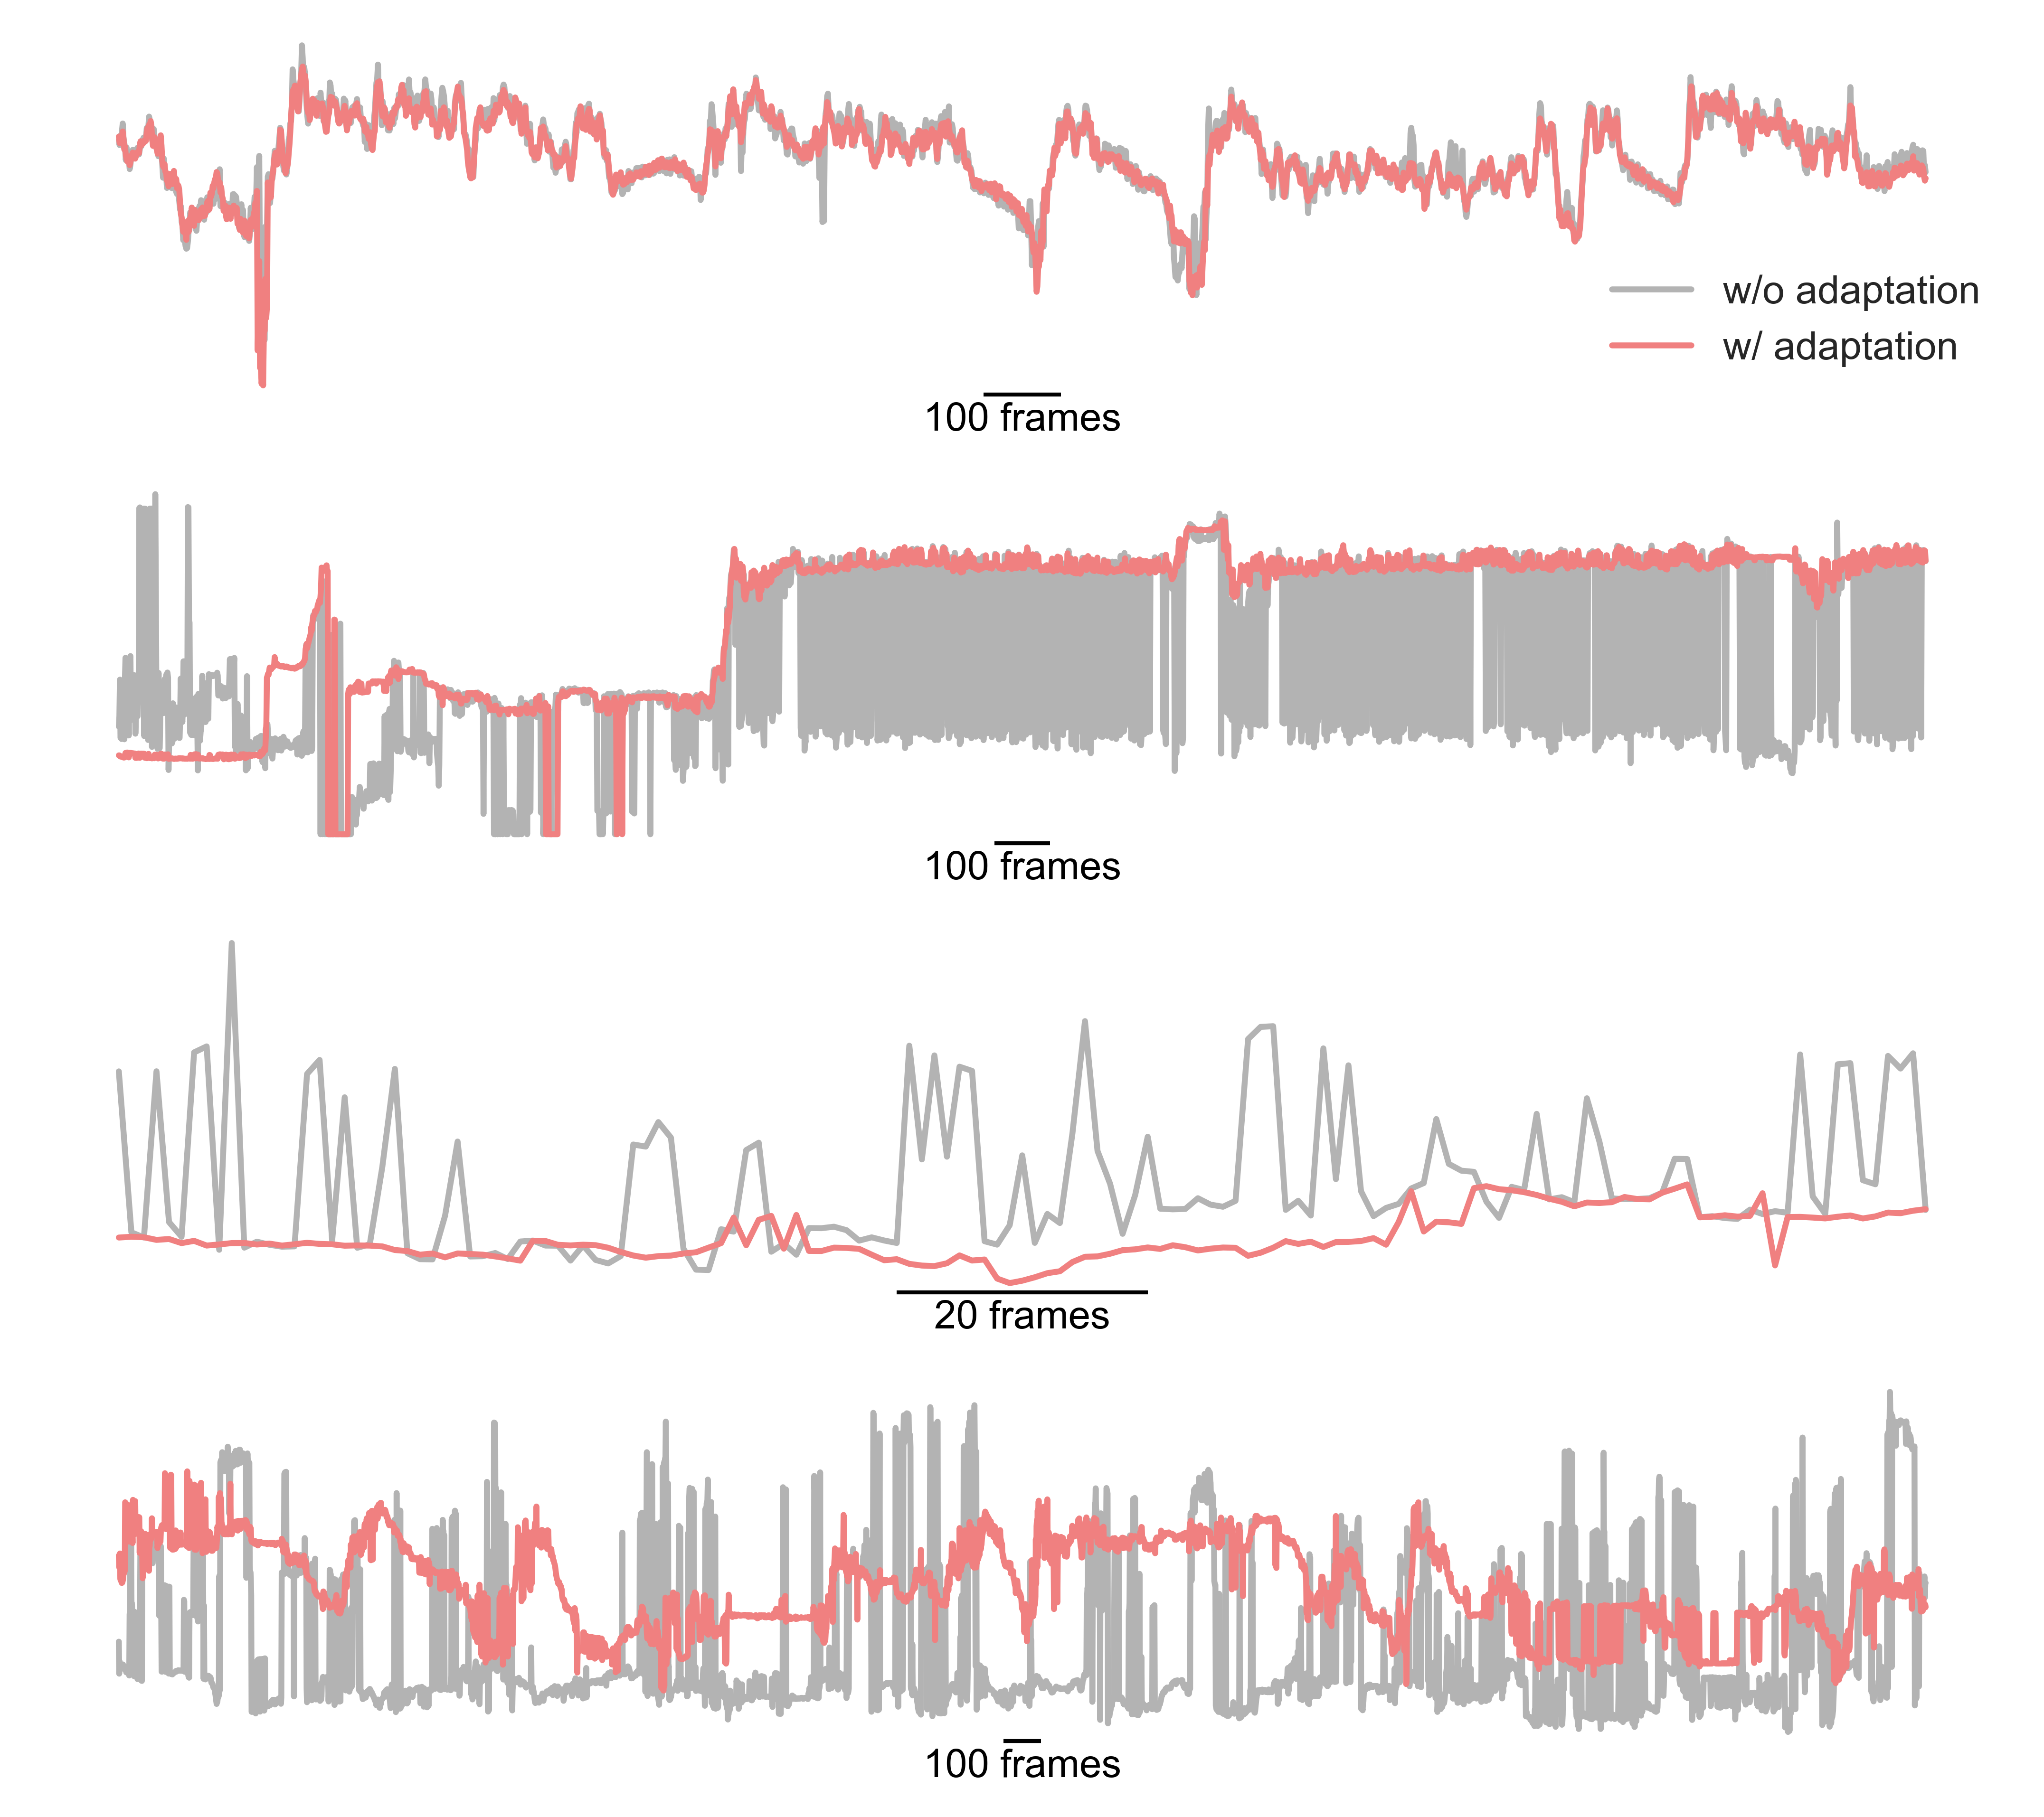

In [3]:
plot_figure3efgh()

In [4]:
quadruped_before_adapt = {'black_dog': '../data/Figure3/black_dog_0.5_pseudo_dataset/video_adaptation_fix_BN/before_adapt_video_pred/black_dog.mp4.json' ,
                          'elf': '../data/Figure3/elf_0.5_pseudo_dataset/video_adaptation_fix_BN/before_adapt_video_pred/elf.mp4.json',
                          'horse': '../data/Figure3/Sample17_0.5_pseudo_dataset/video_adaptation_fix_BN/before_adapt_video_pred/Sample17.mp4.json'}


quadruped_post_adapt = {'black_dog': '../data/Figure3/black_dog_0.5_pseudo_dataset/video_adaptation_fix_BN/after_adapt_video_pred/black_dog.mp4.json' ,
                        'elf': '../data/Figure3/elf_0.5_pseudo_dataset/video_adaptation_fix_BN/after_adapt_video_pred/elf.mp4.json',
                        'horse': '../data/Figure3/Sample17_0.5_pseudo_dataset/video_adaptation_fix_BN/after_adapt_video_pred/Sample17.mp4.json'}


filtered_quadruped_post_adapt = {'black_dog': '../data/Figure3/black_dog_0.5_pseudo_dataset/median_filter/after_adapt_video_pred/black_dog.mp4.json' ,
                                 'elf': '../data/Figure3/elf_0.5_pseudo_dataset/median_filter/after_adapt_video_pred/elf.mp4.json',
                                 'horse': '../data/Figure3/Sample17_0.5_pseudo_dataset/median_filter/after_adapt_video_pred/Sample17.mp4.json'}


In [5]:
import matplotlib.pyplot as plt
import json
import numpy as np
def parse_json(json_path):
    with open(json_path, 'r') as f:
        obj = json.load(f)

    return obj

before_adapt_black_dog_obj = parse_json(quadruped_before_adapt['black_dog'])
before_adapt_elf_obj = parse_json(quadruped_before_adapt['elf'])
before_adapt_horse_obj = parse_json(quadruped_before_adapt['horse'])
post_adapt_black_dog_obj = parse_json(quadruped_post_adapt['black_dog'])
post_adapt_elf_obj = parse_json(quadruped_post_adapt['elf'])
post_adapt_horse_obj = parse_json(quadruped_post_adapt['horse'])
filtered_post_adapt_black_dog_obj = parse_json(filtered_quadruped_post_adapt['black_dog'])
filtered_post_adapt_elf_obj = parse_json(filtered_quadruped_post_adapt['elf'])
filtered_post_adapt_horse_obj = parse_json(filtered_quadruped_post_adapt['horse'])


def get_keypoints_from_obj(obj):
    kpts_array = []
    for idx, (k,v) in enumerate(obj.items()):
        if len(v) == 0:
            kpts_array.append(np.zeros((39, 3)))
            continue
        keypoints = v[0]['keypoints']
        kpts_array.append(keypoints)

    return np.array(kpts_array)

before_adapt_black_dog_kpts = get_keypoints_from_obj(before_adapt_black_dog_obj)
before_adapt_elf_kpts = get_keypoints_from_obj(before_adapt_elf_obj)
before_adapt_horse_kpts = get_keypoints_from_obj(before_adapt_horse_obj)

print (before_adapt_horse_kpts.shape)

post_adapt_black_dog_kpts = get_keypoints_from_obj(post_adapt_black_dog_obj)
post_adapt_elf_kpts = get_keypoints_from_obj(post_adapt_elf_obj)
post_adapt_horse_kpts = get_keypoints_from_obj(post_adapt_horse_obj)



filtered_post_adapt_black_dog_kpts = get_keypoints_from_obj(filtered_post_adapt_black_dog_obj)
filtered_post_adapt_elf_kpts = get_keypoints_from_obj(filtered_post_adapt_elf_obj)
filtered_post_adapt_horse_kpts = get_keypoints_from_obj(filtered_post_adapt_horse_obj)


(240, 39, 3)


In [6]:
import numpy as np
from scipy.spatial import ConvexHull

def compute_areas(keypoints):
    # Initialize array for areas
    areas = np.zeros(keypoints.shape[0])

    # For each frame
    for i in range(keypoints.shape[0]):
        # Get the keypoints for this frame
        frame_kpts = keypoints[i, :, :2]  # Ignoring the likelihood values
        try:
            # Compute the convex hull for the keypoints
            hull = ConvexHull(frame_kpts)
            # The area of the convex hull can be accessed directly
            areas[i] = hull.volume  # In 2D, 'volume' is actually area
        except:
            areas[i] = np.nan
    mask = ~np.isnan(areas)
    # Use the mask to extract the subset of non-NaN values
    areas = areas[mask]
    areas = np.sqrt(areas)
    return areas


square_root_areas_before_adapt_black_dog = compute_areas(before_adapt_black_dog_kpts)
square_root_areas_before_adapt_elf = compute_areas(before_adapt_elf_kpts)
square_root_areas_before_adapt_horse = compute_areas(before_adapt_horse_kpts)

square_root_areas_post_adapt_black_dog = compute_areas(post_adapt_black_dog_kpts)
square_root_areas_post_adapt_elf = compute_areas(post_adapt_elf_kpts)
square_root_areas_post_adapt_horse = compute_areas(post_adapt_horse_kpts)

square_root_areas_filtered_post_adapt_black_dog = compute_areas(filtered_post_adapt_black_dog_kpts)
square_root_areas_filtered_post_adapt_elf = compute_areas(filtered_post_adapt_elf_kpts)
square_root_areas_filtered_post_adapt_horse = compute_areas(filtered_post_adapt_horse_kpts)


In [7]:
def plot_adaptation_score_for_quadruped(data_pre, data_post, data_filtered_post, metric, videoname):


    fig, axs = plt.subplots(1, figsize=(9, 2), dpi=600)

    score_pre = data_pre
    score_post = data_post
    score_filered_post = data_filtered_post



    axs.plot(score_pre, c='dimgray', alpha=.5, label='w/o adaptation')
    axs.plot(score_post, c='lightcoral', label='w/ adaptation')
    axs.plot(score_filered_post, c='purple', label='w/ adaptation')

    scalebar = AnchoredSizeBar(
       axs.transData,
       size=100,
       label='100 frames',
       loc='lower center',
       frameon=False,
       borderpad=-1,
    )

    axs.set_xticklabels([])
    axs.xaxis.set_tick_params(length=0)
    axs.set_yticklabels([])
    axs.yaxis.set_tick_params(length=0)
    axs.add_artist(scalebar)
    sns.despine(ax=axs, top=True, right=True, left=True, bottom=True)

    #axs[0].legend(frameon=False, loc='lower right')
    fig.suptitle(f'{videoname}  {metric} score over time')
    fig.savefig(f'{videoname}_{metric}.png', dpi=400, bbox_inches='tight', pad_inches=0.05, transparent = True)

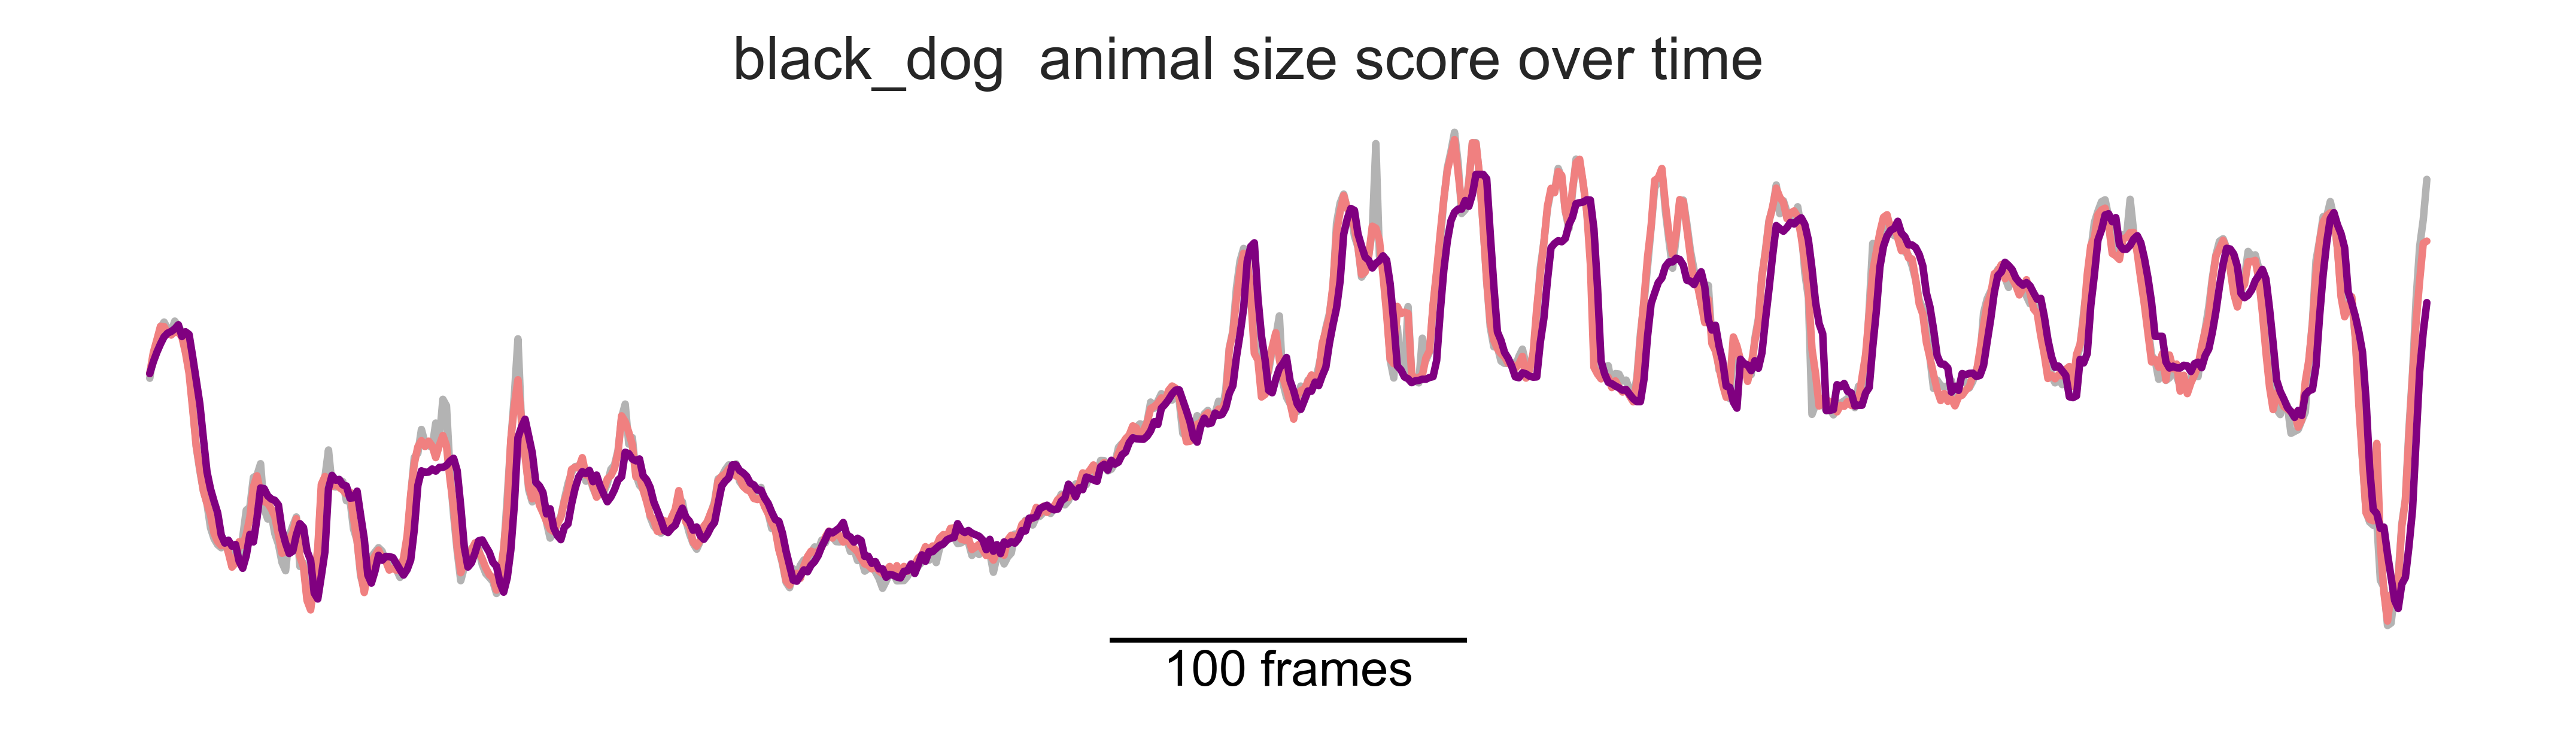

In [8]:
plot_adaptation_score_for_quadruped(square_root_areas_before_adapt_black_dog , square_root_areas_post_adapt_black_dog, square_root_areas_filtered_post_adapt_black_dog, 'animal size', 'black_dog' )


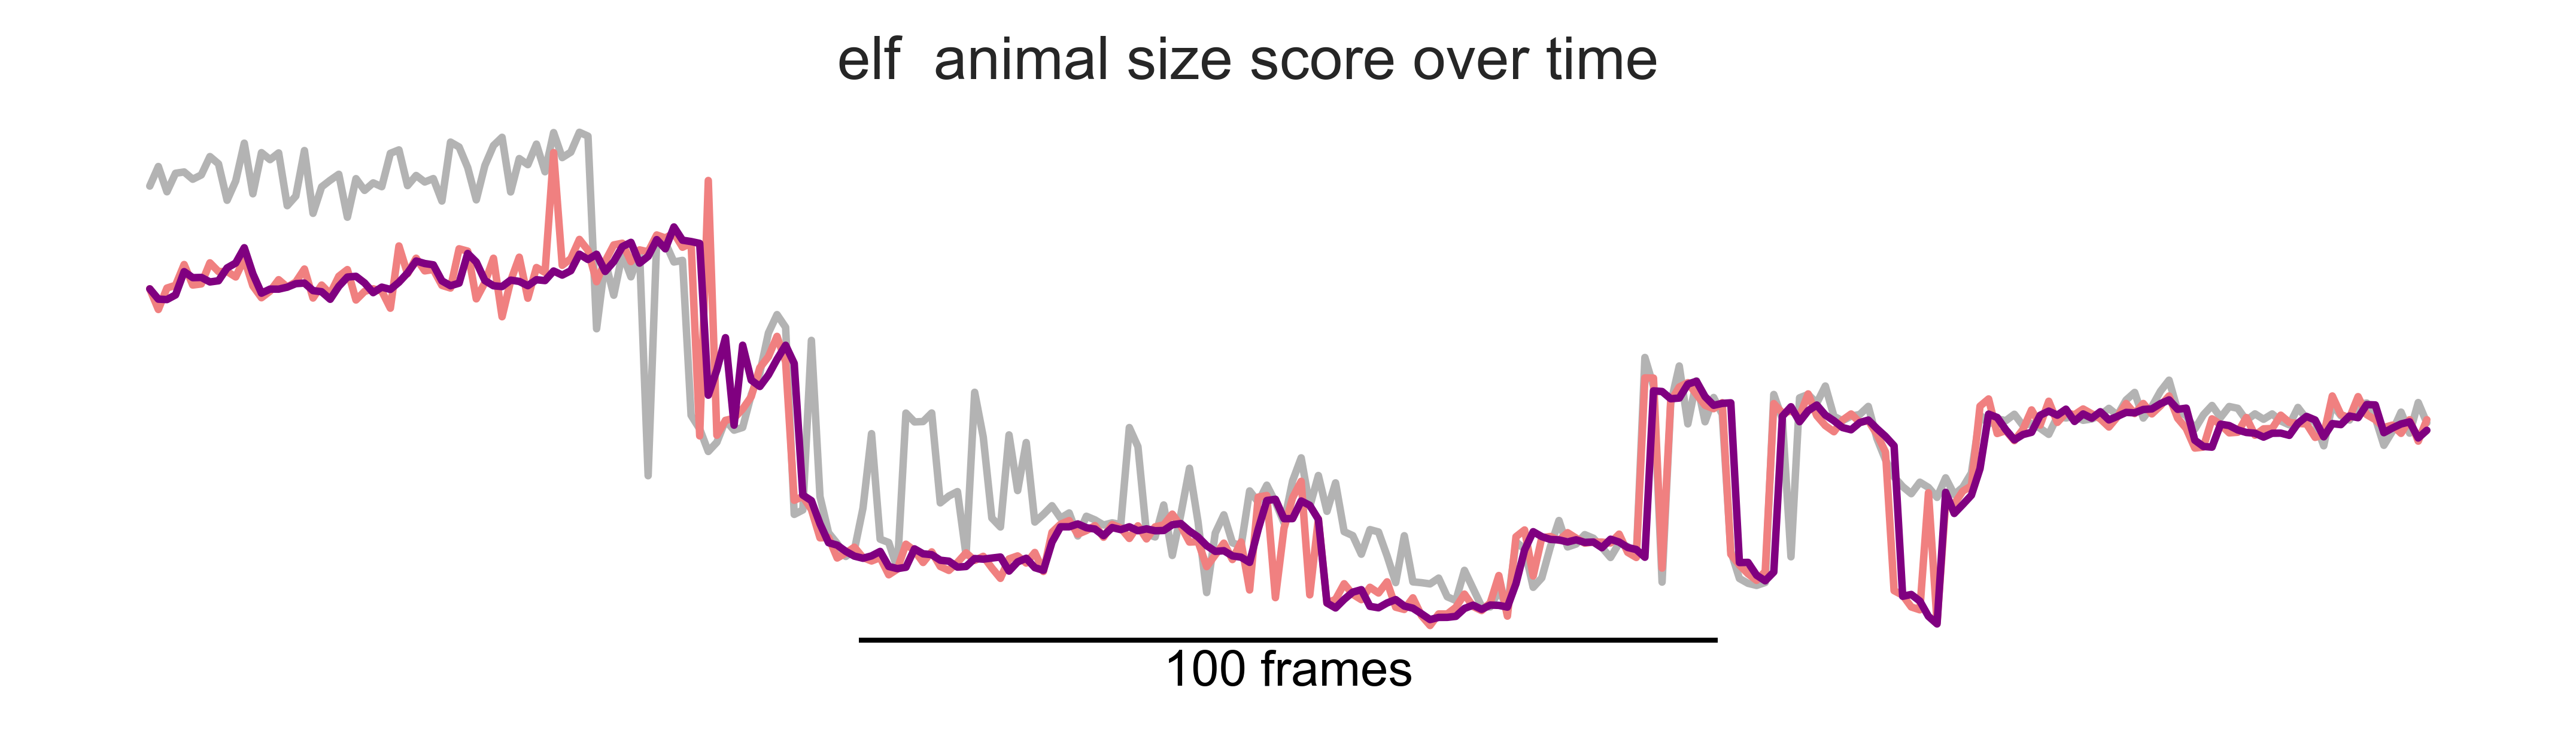

In [9]:
plot_adaptation_score_for_quadruped(square_root_areas_before_adapt_elf , square_root_areas_post_adapt_elf, square_root_areas_filtered_post_adapt_elf,'animal size', 'elf' )


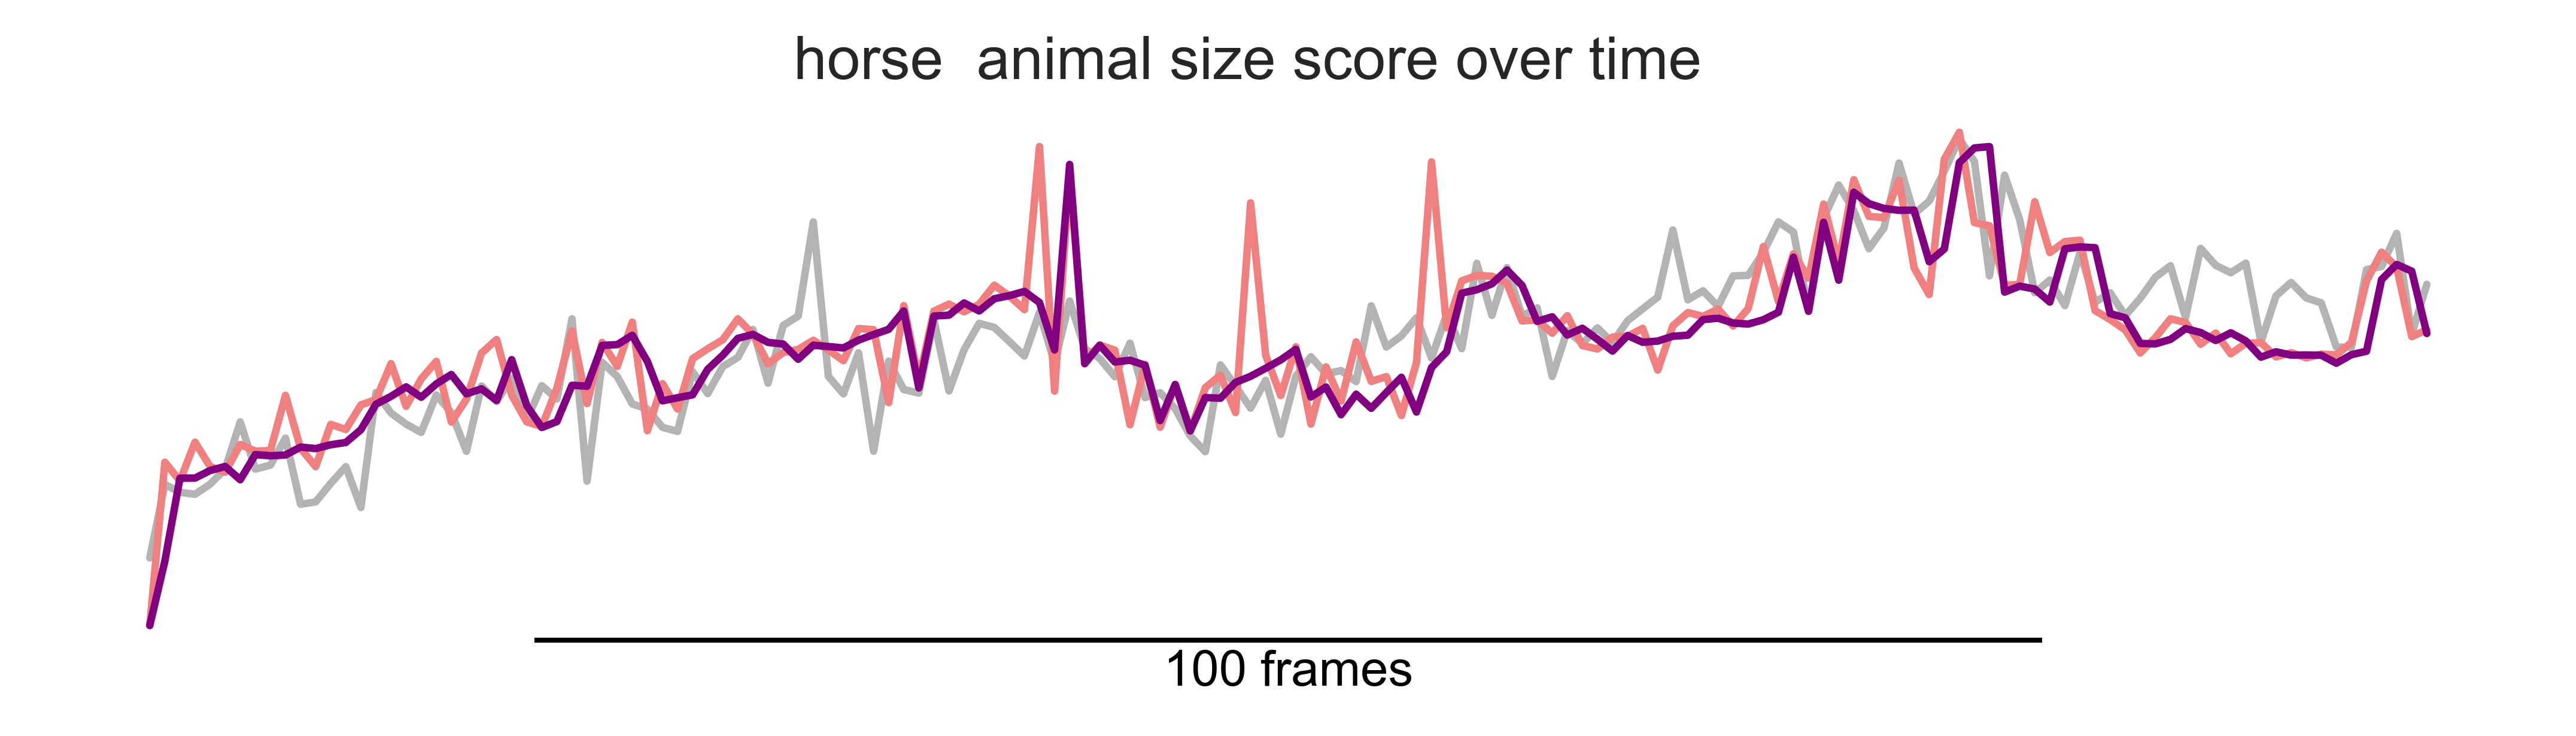

In [10]:
plot_adaptation_score_for_quadruped(square_root_areas_before_adapt_horse , square_root_areas_post_adapt_horse, square_root_areas_filtered_post_adapt_horse,'animal size', 'horse' )


In [11]:
import cv2
import os

def extract_frames(video_path):
    # Ensure the video file exists
    if not os.path.exists(video_path):
        return

    # Load the video
    video = cv2.VideoCapture(video_path)

    # Get the video's basename and directory to construct output path
    video_dir, video_filename = os.path.split(video_path)
    video_basename = os.path.splitext(video_filename)[0]

    # Initialize frame counter
    count = 0

    success, image = video.read()
    while success:
        # Construct output path for each frame
        frame_filename = f"{video_basename}_frame_{count}.png"
        frame_path = os.path.join(video_dir, frame_filename)

        # Write frame to a PNG image
        cv2.imwrite(frame_path, image)

        success, image = video.read()
        count += 1


In [12]:
dog_frame_index = 30
elf_frame_index = 100
horse_frame_index = 170
dog_frame = f'../data/Figure3/quadruped_video_imgs/black_dog/black_dog_frame_{dog_frame_index}.png'
elf_frame = f'../data/Figure3/quadruped_video_imgs/elf/elf_frame_{elf_frame_index}.png'
horse_frame = f'../data/Figure3/quadruped_video_imgs/horse/frame_{horse_frame_index}.jpg'


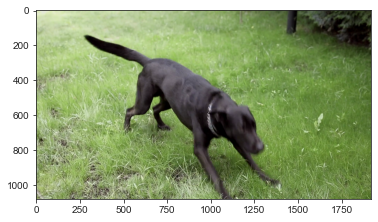

In [13]:
img = cv2.imread(dog_frame)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


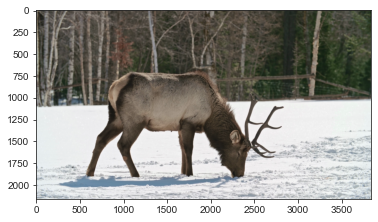

In [14]:
img = cv2.imread(elf_frame)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

../data/Figure3/quadruped_video_imgs/horse/frame_170.jpg


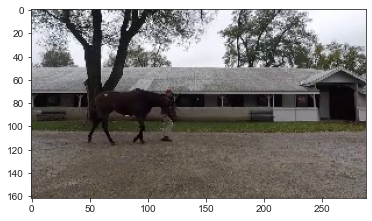

In [15]:
print (horse_frame)

img = cv2.imread(horse_frame)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [16]:
def plot_keypoints(image, keypoints, kpt_colors, frame_index, last_n=5, title = 'temp.png'):
    # Ensure frame index is valid
    if not (0 <= frame_index < len(keypoints)):
        print (keypoints.shape)
        print(f"Invalid frame index: {frame_index}")
        return

    # Read image
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Create a new figure and show the image
    plt.figure()
    plt.imshow(img)

    kpt_colors = np.array(kpt_colors)
    kpt_colors = [color[::-1]/255.0 for color in kpt_colors]

    # Get the keypoints for the last_n frames relative to the given frame index
    for i in range(frame_index - last_n + 1, frame_index + 1):
        kpts = keypoints[i, :, :2]  # We take only the first two dimensions for 2D plotting

        # Plot each keypoint
        for kpt, color in zip(kpts, kpt_colors):
            plt.scatter(*kpt, color=color, s= 2)

    plt.savefig(f'{title}.png', transparent = True, dpi = 300)

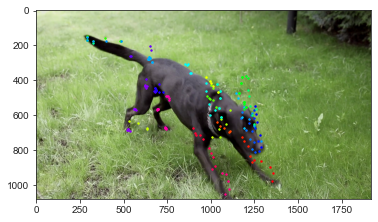

In [17]:
kpt_colors = [[255.0, 0.0, 0.0], [255.0, 39.63408568671726, 0.0], [255.0, 79.26817137343453, 0.0], [255.0, 118.9022570601518, 0.0], [255.0, 158.53634274686905, 0.0], [255.0, 198.17042843358632, 0.0], [255.0, 237.8045141203036, 0.0], [232.56140019297916, 255.0, 0.0], [192.92731450626187, 255.0, 0.0], [153.2932288195446, 255.0, 0.0], [113.65914313282731, 255.0, 0.0], [74.02505744611004, 255.0, 0.0], [34.390971759392784, 255.0, 0.0], [3.5647953575585385, 255.0, 8.807909284882923], [0.0, 255.0, 44.87701729490043], [0.0, 255.0, 84.51085328820125], [0.0, 255.0, 124.14468928150207], [0.0, 255.0, 163.77852527480275], [0.0, 255.0, 203.4123612681037], [0.0, 255.0, 243.04619726140453], [255, 220, 0], [255, 255, 0], [255, 165, 0], [255, 150, 0], [0.0, 68.78344961404169, 255.0], [0.0, 29.14936392732455, 255.0], [10.484721759392611, 0.0, 255.0], [50.11880744611004, 0.0, 255.0], [89.75289313282732, 0.0, 255.0], [129.38697881954448, 0.0, 255.0], [169.02106450626192, 0.0, 255.0], [169.02106450626192, 0.0, 255.0], [255.0, 0.0, 142.80850706015173], [169.02106450626192, 0.0, 255.0], [255.0, 0.0, 142.80850706015173], [255.0, 0.0, 142.80850706015173], [255.0, 0.0, 103.17442137343447], [255.0, 0.0, 63.54033568671722], [255.0, 0.0, 23.90625]]
plot_keypoints(dog_frame, before_adapt_black_dog_kpts, kpt_colors,  dog_frame_index, title = 'dog_before_adapt')

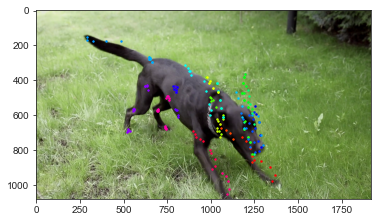

In [18]:
plot_keypoints(dog_frame, post_adapt_black_dog_kpts, kpt_colors,  dog_frame_index, title = 'dog_post_adapt')

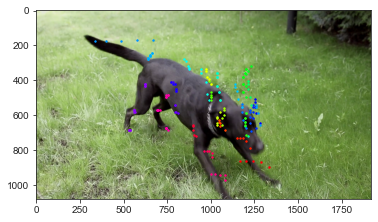

In [19]:
plot_keypoints(dog_frame, filtered_post_adapt_black_dog_kpts, kpt_colors,  dog_frame_index, title = 'dog_filered_post_adapt')

In [20]:
frame_index = 60

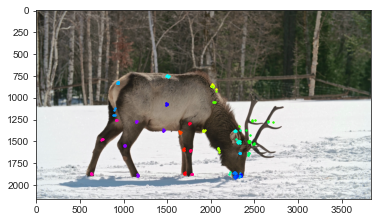

In [21]:
plot_keypoints(elf_frame, before_adapt_elf_kpts, kpt_colors,  elf_frame_index, title = 'elf_before_adapt')

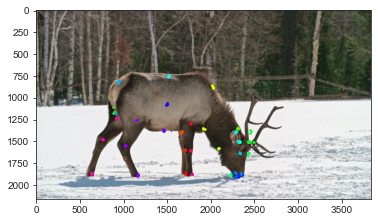

In [22]:
plot_keypoints(elf_frame, post_adapt_elf_kpts, kpt_colors,  elf_frame_index, title = 'elf_post_adapt')

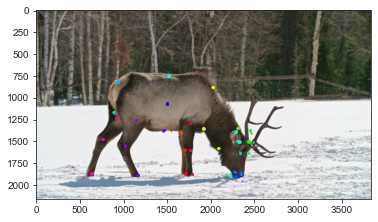

In [23]:
plot_keypoints(elf_frame, filtered_post_adapt_elf_kpts, kpt_colors,  elf_frame_index, title = 'elf_filtered_post_adapt')

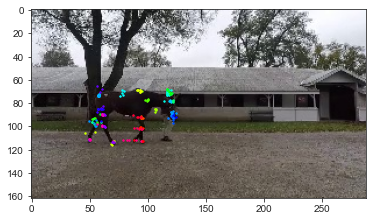

In [24]:
plot_keypoints(horse_frame, before_adapt_horse_kpts, kpt_colors,  horse_frame_index, title = 'horse_before_adapt')

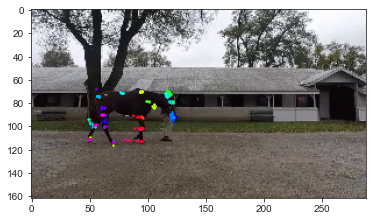

In [25]:
plot_keypoints(horse_frame, post_adapt_horse_kpts, kpt_colors,  horse_frame_index, title = 'horse_post_adapt')

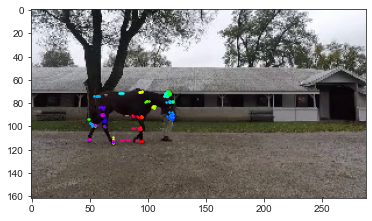

In [26]:
plot_keypoints(horse_frame, filtered_post_adapt_horse_kpts, kpt_colors,  horse_frame_index, title = 'horse_filtered_post_adapt')

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.labelsize'] = 17  # for x and y labels
plt.rcParams['xtick.labelsize'] = 17 # for x axis tick labels
plt.rcParams['ytick.labelsize'] = 17 # for y axis tick labels
plt.rcParams['axes.titlesize'] = 17


dict_ = pd.read_hdf('../data/Figure3/video_adaptation_scores.h5').to_dict()
dfs = []

for k, v in dict_.items():
    if not ('keypoint_dropping' in k or 'jittering' in k):
        continue
    temp = []
    for k2, v2 in v.items():
        try:
            df_ = pd.DataFrame(v2, columns=['val'])
        except ValueError:
            df_ = pd.DataFrame(np.nanmean(v2, axis=(0, 2)), columns=['val'])
        df_['video'] = k2
        temp.append(df_)
    temp = pd.concat(temp)
    temp['cond'] = k[0]
    temp['metric'] = k[1]
    temp['niters'] = int(k[2])
    dfs.append(temp)

df = pd.concat(dfs)
df_ = df
videos = list(df_.video.unique())
niters = dict(zip(videos, [2000, 1000, 2000, 1000]))
metrics = list(df_.metric.unique())

mice_jitter_scores = []
mice_keypoint_dropping_scores = []

for i, video in enumerate(videos):
    for j, metric in enumerate(metrics):
        temp = df_[
            (df_['video'] == video) & (df_['metric'] == metric) & ((df_['niters'] == 200000) | (df_['niters'] == niters[video]))
        ]
        if metric == 'jittering':
            mice_jitter_scores.append(temp.to_numpy())
        if metric == 'keypoint_dropping':
            mice_keypoint_dropping_scores.append(temp.to_numpy())


In [28]:
elf = pd.read_hdf('../data/Figure3/elf_jitter.h5').to_dict()

elf_jitter_before_adapt = elf['jitter_score']['before_adapt']
elf_jitter_after_adapt = elf['jitter_score']['after_adapt']

black_dog = pd.read_hdf('../data/Figure3/black_dog_jitter.h5').to_dict()
black_dog_jitter_before_adapt = black_dog['jitter_score']['before_adapt']
black_dog_jitter_after_adapt = black_dog['jitter_score']['after_adapt']


horse = pd.read_hdf('../data/Figure3/Sample17_jitter.h5').to_dict()
horse_jitter_before_adapt = horse['jitter_score']['before_adapt']
horse_jitter_after_adapt = horse['jitter_score']['after_adapt']


Dataset          object
Time             object
Jitter Score    float64
dtype: object


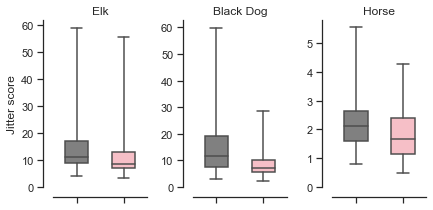

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Create a DataFrame from the np arrays
df_elf = pd.DataFrame({
    'Dataset': 'Elk',
    'Time': np.concatenate((['Before Adaptation']*len(elf_jitter_before_adapt), ['After Adaptation']*len(elf_jitter_after_adapt))),
    'Jitter Score': np.concatenate((elf_jitter_before_adapt, elf_jitter_after_adapt))
})

df_black_dog = pd.DataFrame({
    'Dataset': 'Black Dog',
    'Time': np.concatenate((['Before Adaptation']*len(black_dog_jitter_before_adapt), ['After Adaptation']*len(black_dog_jitter_after_adapt))),
    'Jitter Score': np.concatenate((black_dog_jitter_before_adapt, black_dog_jitter_after_adapt))
})

df_horse = pd.DataFrame({
    'Dataset': 'Horse',
    'Time': np.concatenate((['Before Adaptation']*len(horse_jitter_before_adapt), ['After Adaptation']*len(horse_jitter_after_adapt))),
    'Jitter Score': np.concatenate((horse_jitter_before_adapt, horse_jitter_after_adapt))
})


df = pd.concat([df_elf, df_black_dog, df_horse])

print(df.dtypes)

fig, axes = plt.subplots(ncols=3, figsize=(6, 3))
plt.tight_layout()
for dataset, ax in zip(['Elk', 'Black Dog', 'Horse'], axes):
    ax.set_title(dataset)  # Set title for each subplot
    df_ = df[df['Dataset'] == dataset]
    sns.boxplot(
        df_, x="Time", y="Jitter Score",
        whis=[0, 100], width=.5, palette=['grey', 'lightpink'],
        showfliers=False, ax=ax,
    )
    # sns.stripplot(df_, x="Time", y="Jitter Score", size=4, color=".3", alpha=.5, ax=ax)
    sns.despine(trim=False, top=True, right=True, ax=ax, offset=10)

axes[0].set(ylabel="Jitter score")
for ax in axes:
    # ax.yaxis.grid(True)
    ax.set_xticklabels([])
    ax.set_xlabel('')
    ax.set_ylim(0, ax.get_ylim()[1])
#     ax.spines['bottom'].set_color('white')
#     ax.spines['left'].set_color('white')
for ax in axes[1:]:
    ax.set_ylabel('')


plt.savefig('quadruped_boxplot.svg', dpi=600, bbox_inches='tight', pad_inches=0.05, transparent=True)


In [30]:

dlc_openfield = np.array(mice_jitter_scores[0])
maushaus = np.array(mice_jitter_scores[1])
smear_mouse = np.array(mice_jitter_scores[2])
golden_mouse = np.array(mice_jitter_scores[3])





dlc_openfield_jitter_before_adapt = dlc_openfield[dlc_openfield[:, 2] == 'before_adapt'][:, 0]
dlc_openfield_jitter_after_adapt = dlc_openfield[dlc_openfield[:, 2] == 'after_adapt'][:, 0]

maushaus_jitter_before_adapt = maushaus[maushaus[:, 2] == 'before_adapt'][:, 0]
maushaus_jitter_after_adapt = maushaus[maushaus[:, 2] == 'after_adapt'][:, 0]

smear_mouse_jitter_before_adapt = smear_mouse[smear_mouse[:, 2] == 'before_adapt'][:, 0]
smear_mouse_jitter_after_adapt = smear_mouse[smear_mouse[:, 2] == 'after_adapt'][:, 0]

golden_mouse_jitter_before_adapt = golden_mouse[golden_mouse[:, 2] == 'before_adapt'][:, 0]
golden_mouse_jitter_after_adapt = golden_mouse[golden_mouse[:, 2] == 'after_adapt'][:, 0]




dlc_openfield = np.array(mice_keypoint_dropping_scores[0])
maushaus = np.array(mice_keypoint_dropping_scores[1])
smear_mouse = np.array(mice_keypoint_dropping_scores[2])
golden_mouse = np.array(mice_keypoint_dropping_scores[3])


#print (dlc_openfield)
#print (maushaus)

dlc_openfield_keypoint_dropping_before_adapt = dlc_openfield[dlc_openfield[:, 2] == 'before_adapt'][:, 0]
dlc_openfield_keypoint_dropping_after_adapt = dlc_openfield[dlc_openfield[:, 2] == 'after_adapt'][:, 0]

maushaus_keypoint_dropping_before_adapt = maushaus[maushaus[:, 2] == 'before_adapt'][:, 0]
maushaus_keypoint_dropping_after_adapt = maushaus[maushaus[:, 2] == 'after_adapt'][:, 0]

smear_mouse_keypoint_dropping_before_adapt = smear_mouse[smear_mouse[:, 2] == 'before_adapt'][:, 0]
smear_mouse_keypoint_dropping_after_adapt = smear_mouse[smear_mouse[:, 2] == 'after_adapt'][:, 0]

golden_mouse_keypoint_dropping_before_adapt = golden_mouse[golden_mouse[:, 2] == 'before_adapt'][:, 0]
golden_mouse_keypoint_dropping_after_adapt = golden_mouse[golden_mouse[:, 2] == 'after_adapt'][:, 0]


float64


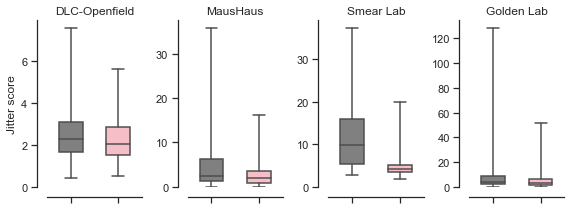

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Create a DataFrame from the np arrays
df_dlc_openfield= pd.DataFrame({
    'Dataset': 'DLC-Openfield',
    'Time': np.concatenate((['Before Adaptation']*len(dlc_openfield_jitter_before_adapt), ['After Adaptation']*len(dlc_openfield_jitter_after_adapt))),
    'Jitter Score': np.concatenate((dlc_openfield_jitter_before_adapt, dlc_openfield_jitter_after_adapt))
})

df_maushaus = pd.DataFrame({
    'Dataset': 'MausHaus',
    'Time': np.concatenate((['Before Adaptation']*len(maushaus_jitter_before_adapt), ['After Adaptation']*len(maushaus_jitter_after_adapt))),
    'Jitter Score': np.concatenate((maushaus_jitter_before_adapt, maushaus_jitter_after_adapt))
})

df_smear_mouse = pd.DataFrame({
    'Dataset': 'Smear Lab',
    'Time': np.concatenate((['Before Adaptation']*len(smear_mouse_jitter_before_adapt), ['After Adaptation']*len(smear_mouse_jitter_after_adapt))),
    'Jitter Score': np.concatenate((smear_mouse_jitter_before_adapt, smear_mouse_jitter_after_adapt))
})

df_golden_mouse = pd.DataFrame({
    'Dataset': 'Golden Lab',
    'Time': np.concatenate((['Before Adaptation']*len(golden_mouse_jitter_before_adapt), ['After Adaptation']*len(golden_mouse_jitter_after_adapt))),
    'Jitter Score': np.concatenate((golden_mouse_jitter_before_adapt, golden_mouse_jitter_after_adapt))
})




df = pd.concat([df_dlc_openfield, df_maushaus, df_smear_mouse, df_golden_mouse])

df['Jitter Score'] = pd.to_numeric(df['Jitter Score'], errors='coerce')



print (df['Jitter Score'].dtype)


fig, axes = plt.subplots(ncols=4, figsize=(8, 3))
plt.tight_layout()
for dataset, ax in zip(['DLC-Openfield', 'MausHaus', 'Smear Lab', 'Golden Lab'], axes):
    ax.set_title(dataset)  # Set title for each subplot
    df_ = df[df['Dataset'] == dataset]
    sns.boxplot(
        df_, x="Time", y="Jitter Score",
        whis=[0, 100], width=.5, palette=['grey', 'lightpink'],
        showfliers=False, ax=ax,
    )
    # sns.stripplot(df_, x="Time", y="Jitter Score", size=4, color=".3", alpha=.5, ax=ax)
    sns.despine(trim=False, top=True, right=True, ax=ax, offset=10)

axes[0].set(ylabel="Jitter score")
for ax in axes:
    # ax.yaxis.grid(True)
    ax.set_xticklabels([])
    ax.set_xlabel('')
    ax.set_ylim(0, ax.get_ylim()[1])
for ax in axes[1:]:
    ax.set_ylabel('')
#     ax.spines['right'].set_color('white')
#     ax.spines['left'].set_color('white')


plt.savefig('mice_jitter_score_boxplot.svg', dpi=600, bbox_inches='tight', pad_inches=0.05, transparent=True)


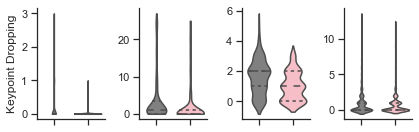

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Create a DataFrame from the np arrays
df_dlc_openfield= pd.DataFrame({
    'Dataset': 'DLC Openfield',
    'Time': np.concatenate((['Before Adaptation']*len(dlc_openfield_keypoint_dropping_before_adapt), ['After Adaptation']*len(dlc_openfield_keypoint_dropping_after_adapt))),
    'Keypoint Dropping': np.concatenate((dlc_openfield_keypoint_dropping_before_adapt, dlc_openfield_keypoint_dropping_after_adapt))
})

df_maushaus = pd.DataFrame({
    'Dataset': 'MausHaus',
    'Time': np.concatenate((['Before Adaptation']*len(maushaus_keypoint_dropping_before_adapt), ['After Adaptation']*len(maushaus_keypoint_dropping_after_adapt))),
    'Keypoint Dropping': np.concatenate((maushaus_keypoint_dropping_before_adapt, maushaus_keypoint_dropping_after_adapt))
})

df_smear_mouse = pd.DataFrame({
    'Dataset': 'Smear Lab',
    'Time': np.concatenate((['Before Adaptation']*len(smear_mouse_keypoint_dropping_before_adapt), ['After Adaptation']*len(smear_mouse_keypoint_dropping_after_adapt))),
    'Keypoint Dropping': np.concatenate((smear_mouse_keypoint_dropping_before_adapt, smear_mouse_keypoint_dropping_after_adapt))
})

df_golden_mouse = pd.DataFrame({
    'Dataset': 'Golden Lab',
    'Time': np.concatenate((['Before Adaptation']*len(golden_mouse_keypoint_dropping_before_adapt), ['After Adaptation']*len(golden_mouse_keypoint_dropping_after_adapt))),
    'Keypoint Dropping': np.concatenate((golden_mouse_keypoint_dropping_before_adapt, golden_mouse_keypoint_dropping_after_adapt))
})




df = pd.concat([df_dlc_openfield, df_maushaus, df_smear_mouse, df_golden_mouse])

df['Keypoint Dropping'] = pd.to_numeric(df['Keypoint Dropping'], errors='coerce')




# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(6, 2), sharex = True, tight_layout=True)



sns.violinplot(
    x='Time', y='Keypoint Dropping', data=df[df['Dataset'] == 'DLC Openfield'], cut = 0,
    split=True, palette=['grey', 'lightpink'], inner='quartiles', ax=axes[0]
)

axes[0].set_xticklabels(['', ''])
axes[0].set_xlabel('')

sns.violinplot(
    x='Time', y='Keypoint Dropping', data=df[df['Dataset'] == 'MausHaus'], cut = 0,
    split=True, palette=['grey', 'lightpink'], inner='quartiles', ax=axes[1]
)

axes[1].set_xticklabels(['', ''])
axes[1].set_ylabel('')
axes[1].set_xlabel('')

sns.violinplot(
    x='Time', y='Keypoint Dropping', data=df[df['Dataset'] == 'Smear Lab'],
    split=True, palette=['grey', 'lightpink'], inner='quartiles', ax=axes[2]
)

axes[2].set_xticklabels(['', ''])
axes[2].set_ylabel('')
axes[2].set_xlabel('')


sns.violinplot(
    x='Time', y='Keypoint Dropping', data=df[df['Dataset'] == 'Golden Lab'],
    split=True, palette=['grey', 'lightpink'], inner='quartiles', ax=axes[3]
)
#axes[2].set_xlabel('Horse')  # Set x-label for the third subplot
axes[3].set_xticklabels(['', ''])
axes[3].set_ylabel('')
axes[3].set_xlabel('')


sns.despine(top = True, right = True)


plt.savefig('mice_keypoint_dropping_violin_plot.png', dpi=300, bbox_inches='tight', transparent = True)


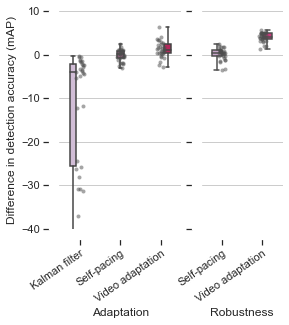

In [45]:
df = pd.read_hdf('../data/Figure3/hrnet_w32_adaptation_results_quadruped80k.h5').reset_index()
df.columns = ['video', 'method', 'cond', 'mAP']
df = df[(df.method != 'self_pacing_fix_BN') & (df.method != 'video_adaptation_relax_BN')]
df['mAP'] *= 100
df['method'] = df['method'].map(
    {
        'kalman_filter': 'Kalman filter',
        'self_pacing_relax_BN': 'Self-pacing',
        'video_adaptation_fix_BN': 'Video adaptation',
    },
)

sns.set_theme(style="ticks")

fig, axes = plt.subplots(ncols=2, figsize=(4, 4), sharey=True, width_ratios=[1.5, 1])
df1 = df[(df.cond == 'adaptation_gain')]
df2 = df[(df.cond == 'robustness_gain')]
for i, df_ in enumerate([df1, df2]):
    sns.boxplot(
        df_, x="method", y="mAP", hue="method",
        whis=[0, 100], width=.5, palette="PuRd",
        showfliers=False, ax=axes[i],
    )
    sns.stripplot(df_, x="method", y="mAP", size=4, color=".3", alpha=.5, ax=axes[i])

axes[0].set(ylabel="Difference in detection accuracy (mAP)")
axes[0].set_xlabel('Adaptation')
axes[1].set_xlabel('Robustness')
axes[1].set_ylabel('')
o = 10
sns.despine(trim=False, top=True, right=True, ax=axes[0], offset=o)
sns.despine(trim=False, top=True, right=True, ax=axes[1], offset=o)
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_ylim(-40, 10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right", rotation_mode='anchor')
    ax.legend().remove()
#     ax.spines['bottom'].set_color('white')
#     ax.spines['left'].set_color('white')

plt.savefig('horse_video_adaptation.jpg', dpi=600, bbox_inches='tight', pad_inches=0.05, transparent=True)
plt.savefig('horse_video_adaptation.svg', dpi=600, bbox_inches='tight', pad_inches=0.05, transparent=True)